# Milestone Project 2: SkimLit 📃🔥

The purpose of this notebook is to build an NLP model to make reading medical abstracts easier.

The paper we're replicating (the source of the dataset that we'll be using) is available here: https://arxiv.org/pdf/1710.06071

And reading through the paper above, we see that the model architecture that they use to achieve their best results is available here: https://arxiv.org/abs/1612.05251

📖**Resource:** If you want to find the ground truth for this notebook (with lots of diagrams and text annotations) see the gitHub: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/09_SkimLit_nlp_milestone_project_2.ipynb



In [ ]:
!pip install tensorflow==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 7.1 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.0
    Uninstalling wrapt-1.17.0:
      Successfully uninstalled wrapt-1.17.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard
    Found existing installation

## Confirm access to a GPU

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-c1fd1ceb-daad-4fcd-63af-da411df2994f)


## Get data

Since we'll be replicating the paper above (PubMe 200k RCT), let's download the dataset we'll use.

We can do so rom the authors GitHub: https://github.com/Franck-Dernoncourt/pubmed-rct

In [ ]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git
!ls pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 39 (delta 8), reused 5 (delta 5), pack-reused 25 (from 1)
Receiving objects: 100% (39/39), 177.08 MiB | 20.79 MiB/s, done.
Resolving deltas: 100% (15/15), done.
Updating files: 100% (13/13), done.
PubMed_200k_RCT				       PubMed_20k_RCT_numbers_replaced_with_at_sign
PubMed_200k_RCT_numbers_replaced_with_at_sign  README.md
PubMed_20k_RCT


In [ ]:
# Check what files are in the PubMed_20K dataset
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign

dev.txt  test.txt  train.txt


* `train.txt` - training samples.
* `dev.txt` - dev is short for development set, which is another name for validation set (in our case, we'll be using and referring to this file as our validation set).
* `test.txt` - test samples.

In [ ]:
# start our experiments using the 20k dataset with numbers replaced by @ sing
data_dir = "/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

In [ ]:
# Check all the filenames in the target directory
import os
filenames =[data_dir + filename for filename in os.listdir(data_dir)]
filenames

['/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt']

## Preprocess data

Now we've got some text data, it's time to become one with it.

And one of the best ways to become one with the data is to...

> Visualize, visualize, visualize

So with that in mind, let's write a function to read in all of the lines of a target text file.

In [ ]:
# Create function to read the lines of a document
def get_lines(filename):
  """
  Read filename (a text filename) and returns the lines of text as a list.

  Arg:
    filename: a string containing the target filepath

  Returns:
    A list of strings with one string per line from the target filename.
  """
  with open(filename, "r") as f: # r stands for read, f stands for file (shortname)
    return f.readlines() # this reads the remaining lines from the file object and returns them as a list

In [ ]:
# Let's read in the training lines
train_lines = get_lines(data_dir+"train.txt") #read the lines with the training file
train_lines[:20]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [ ]:
len(train_lines)

210040

Let's think about how we want our data to look...

How I think our data would be best represented...

```
[{'line_number' : 0,
  'target' : 'BACKGROUND',
   'text': "Emotional eating is associated with overeating and the development of obesity .\n",
  'total_lines' : 11 },
  ...]
```


In [ ]:
def preprocess_text_with_line_numbers(filename):
  """
  Returns a list of dictionaries of abstract line data.

  Takes in filename, reads it contents and sorts through each line, extracting
  things like the target label, the text of the sentence, how many sentences are in,
  the current abstract and what sentence number the target line is.
  """
  # Read the file
  input_lines = get_lines(filename) # get all lines from the filename
  # Initialize Storage
  abstract_lines = "" # create an empty abstract to store the lines of one abstract
  abstract_samples = [] # create an empty list of abstracts

  # Loop through each line in the target file
  for line in input_lines:
    if line.startswith("###"): #check to see if it is and ID line
      abstract_id = line
      abstract_lines = "" #reset the abstract string if the line is an ID line
    elif line.isspace(): #check to see if line is a new line. This means the end of an abstract
      abstract_line_split = abstract_lines.splitlines() #split abstract into separate lines

      # Iterate through each line in a single abstract and count them at the same time
      for abstract_line_number, abstract_line in enumerate (abstract_line_split):
        line_data = {} # create an empty dictionary for each line
        target_text_split = abstract_line.split("\t") #split target label from text
        line_data["target"] = target_text_split[0] # get target label
        line_data["text"] = target_text_split[1].lower() # get target text and lower it
        line_data["line_number"] = abstract_line_number  # ehat number lines does the line appear in the abstrat
        line_data["total_lines"] = len(abstract_line_split) - 1 #how many total lines are there in the target abstract? (start from 0)
        abstract_samples.append(line_data) # add line data to abstract samples list

    else: #if the above condictions aren't fulfilled, the line contains a labelled sentence
      abstract_lines += line

  return abstract_samples


In [ ]:
# Get data from file and process it
%%time
train_samples = preprocess_text_with_line_numbers(data_dir+"train.txt")
val_samples = preprocess_text_with_line_numbers(data_dir+"dev.txt")
test_samples = preprocess_text_with_line_numbers(data_dir+"test.txt")
len(train_samples), len(val_samples), len(test_samples)

CPU times: user 548 ms, sys: 114 ms, total: 662 ms
Wall time: 697 ms


(180040, 30212, 30135)

In [ ]:
# Check the first abstract of our training data
train_samples[:14]

[{'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'line_number': 0,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 1,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_number': 2,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'line_number': 3,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'secondary outcome measures included the western ontari

Now that our data is in the format of a list of dictionaries, how about we turn it into a dataframe to futher visualize it.

In [ ]:
import pandas as pd
train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)
train_df.head(14)

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
5,METHODS,"serum levels of interleukin @ ( il-@ ) , il-@ ...",5,11
6,RESULTS,there was a clinically relevant reduction in t...,6,11
7,RESULTS,the mean difference between treatment arms ( @...,7,11
8,RESULTS,"further , there was a clinically relevant redu...",8,11
9,RESULTS,these differences remained significant at @ we...,9,11


In [ ]:
# Distribution of labels in traning data
train_df.target.value_counts()

,count
target,
METHODS,59353
RESULTS,57953
CONCLUSIONS,27168
BACKGROUND,21727
OBJECTIVE,13839


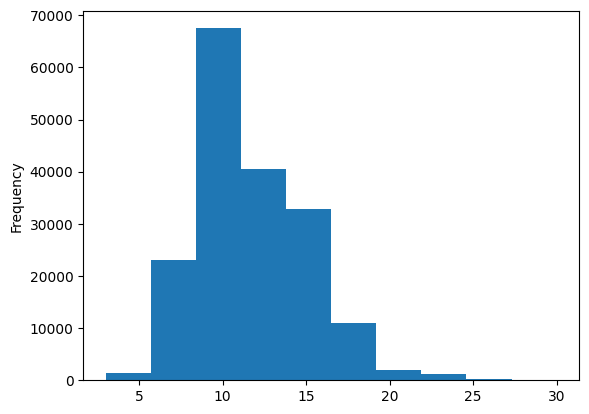

In [ ]:
# Let's check the length of different lines
train_df.total_lines.plot.hist();

### Get list of sentences

When we build our deep learning model, one of its main inputs will be a list of strings (the lines of an abstract).

We can get these easly from our dataframes by calling the `tolist()` method on our `"text"` columns.

In [ ]:
# Convert abstract text line into list
train_sentences = train_df["text"].tolist()
val_sentences = val_df["text"].tolist()
test_sentences = test_df["text"].tolist()

len(train_sentences), len(val_sentences), len(test_sentences)

(180040, 30212, 30135)

In [ ]:
# View the 10 lines of training sentences
train_sentences[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

## Make numeric labels (ML models require numeric labels)

We are going to create one hot and label enconded labels.

We could get away with just making label enconded labels, however, TensorFlow's CategoricalCrossentropy loss function likes to have one hot enconded labels (this will enable us to use label smoothing later on).

To numerically enconde labels we'll use Scikit-Learn's `OneHotEnconder` and `LabelEnconder`.


A sparse matrix is a matrix in which most of the elements are zero. (from the code below).

Our one_hot_encoder instance requieres a 2D array and we got a 1D array. So we have to reshape our arrays.

In [ ]:
# One hot enconde labels
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse_output= False) #we want non-sparse matrix
train_labels_one_hot = one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1,1))
val_labels_one_hot = one_hot_encoder.fit_transform(val_df["target"].to_numpy().reshape(-1,1))
test_labels_one_hot = one_hot_encoder.fit_transform(test_df["target"].to_numpy().reshape(-1,1))

# Check what one hot enconder labels look like
train_labels_one_hot[:10]


array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

### Label encode labels

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Extract labels ("target" columns) and enconde them into integers
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df["target"].to_numpy())
val_labels_encoded = label_encoder.fit_transform(val_df["target"].to_numpy())
test_labels_enconded = label_encoder.fit_transform(test_df["target"].to_numpy())

# Check labelsenconder
train_labels_encoded[:10]


array([3, 2, 2, 2, 2, 2, 4, 4, 4, 4])

In [ ]:
# Get class names and number of classes from LabelEncoder instance
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_
num_classes, class_names

(5,
 array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

## Starting a series of modelling experiments...

As usual, we're goint to be trying out a bunch of different models and seeing which one works best.

And as always, we're going to start with a baseline (TF-IDF Multinomial Naive Bayes classifier)

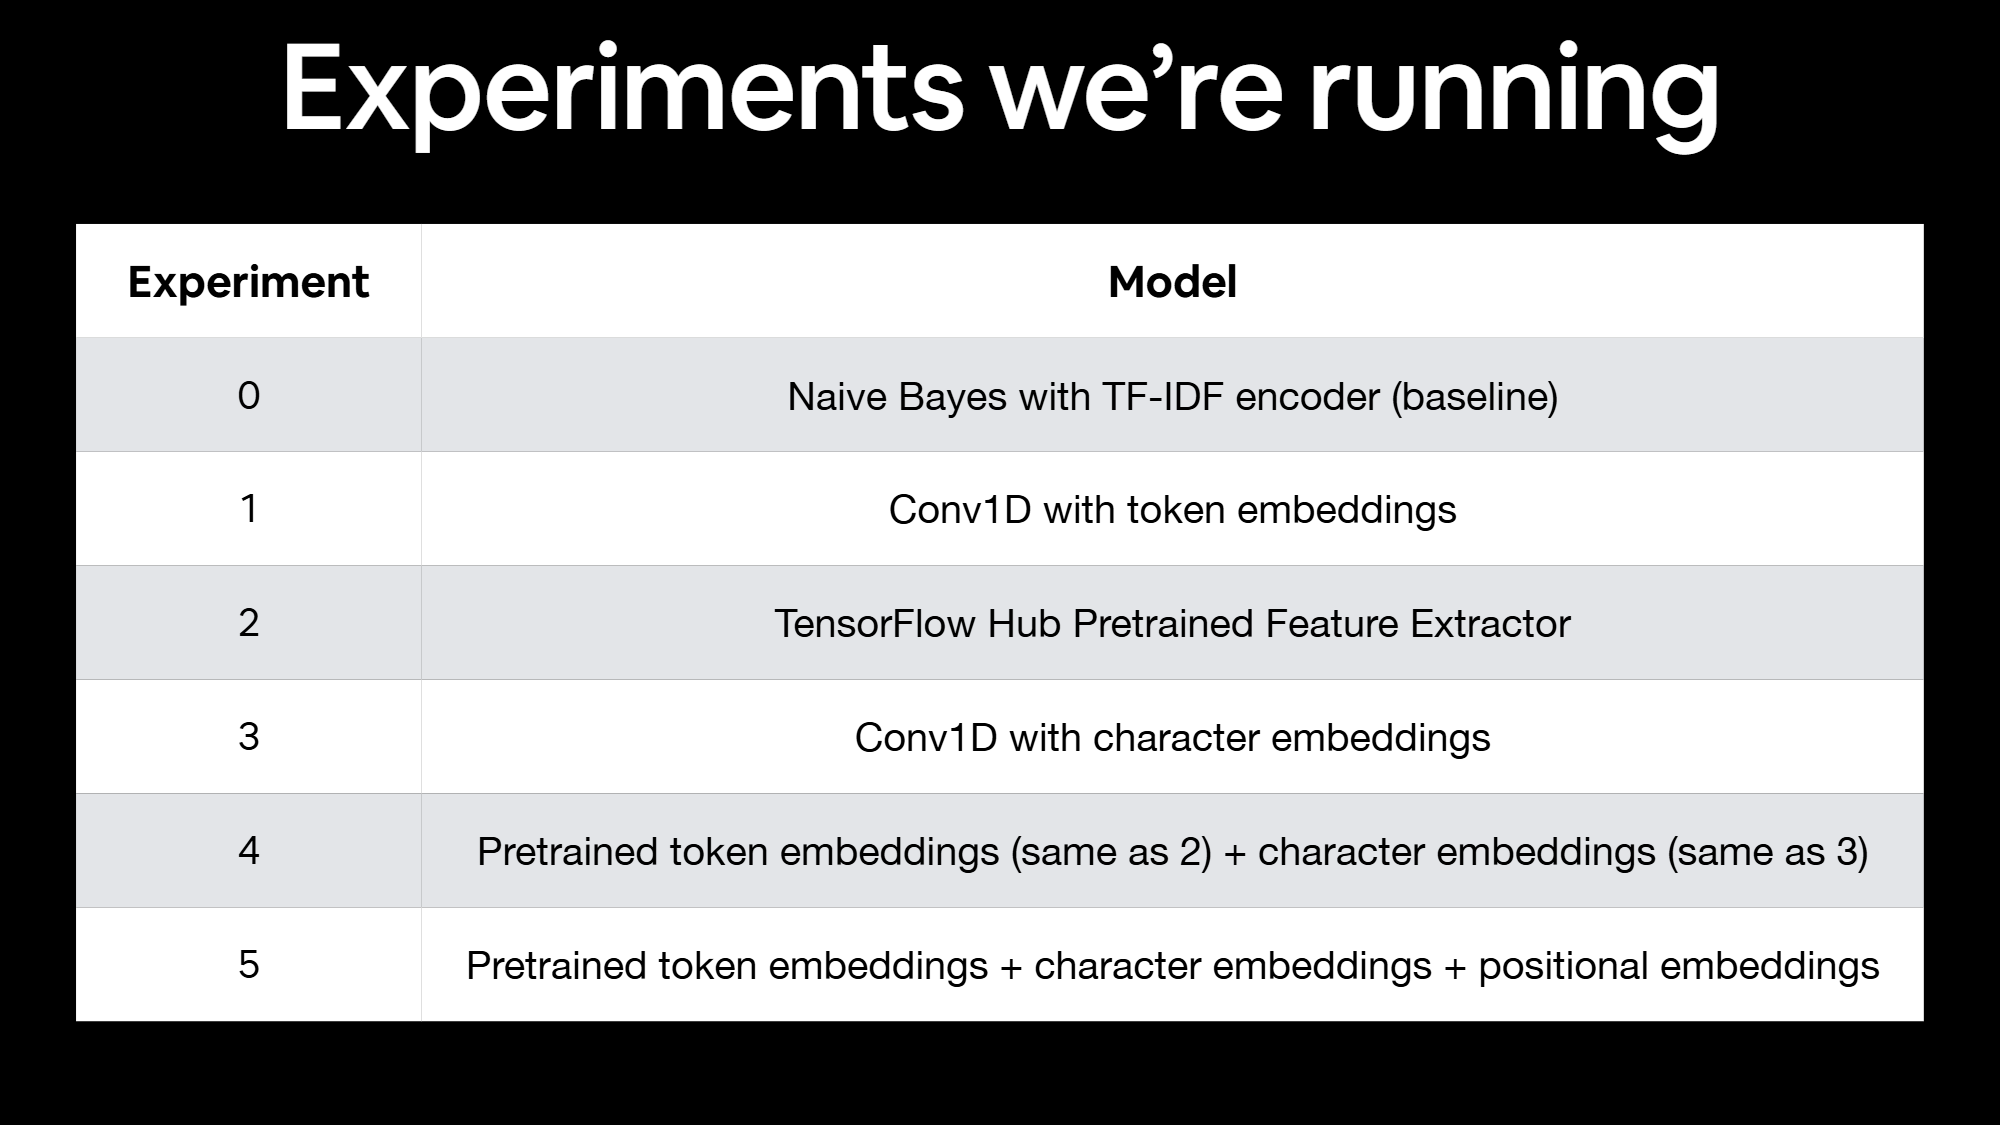

## Baseline model: Model 0

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])

# Fit the pipeline to the training data
model_0.fit(train_sentences,train_labels_encoded);


In [ ]:
# Evaluate our baseline model
baseline_score = model_0.score(X= val_sentences,
                               y=val_labels_encoded)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 72.18%


In [ ]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([4, 1, 3, 2, 2, 2, 2, 2, 4, 4, 0, 4, 1, 1, 2, 2, 4, 1, 4, 4])

### Download helper functions script

In the previous module, we wrote a funtion to compare predictions across differente metrics (accuracy,precision, recall, and F1) and rather than rewriting it here, let's download it from our helper function script.: https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/extras/helper_functions.py

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/extras/helper_functions.py

--2025-01-21 14:19:30--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2025-01-21 14:19:30 (84.8 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import calculate_results

In [ ]:
# Calculate baseline results
baseline_results = calculate_results(y_true=val_labels_encoded,
                                     y_pred = baseline_preds)
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

## Preparing our data (the text) for deep sequence model

Before we start building deeper models, we've got to create vectorization and embdding layers.

### Text vectorization (tokenization)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
# How long is each sentence on average?
sent_lens = [len(sentence.split()) for sentence in train_sentences]
avg_sent_len = np.mean(sent_lens)
avg_sent_len

26.338269273494777

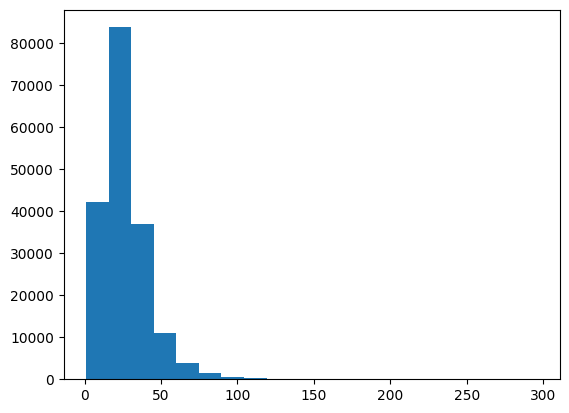

In [ ]:
# What's the distribution look like?
import matplotlib.pyplot as plt
plt.hist(sent_lens, bins = 20);

The majority of sentences are between 0 and 50 tokens in length.

In [ ]:
# How long of a sentence length covers 95% of examples?
output_seq_len = int(np.percentile(sent_lens,95))
output_seq_len

55

In [ ]:
# Max sequence length in the training set
max(sent_lens)

296

### Create text vectorizer layer

We want to make a layer which maps our text from words to numbers.

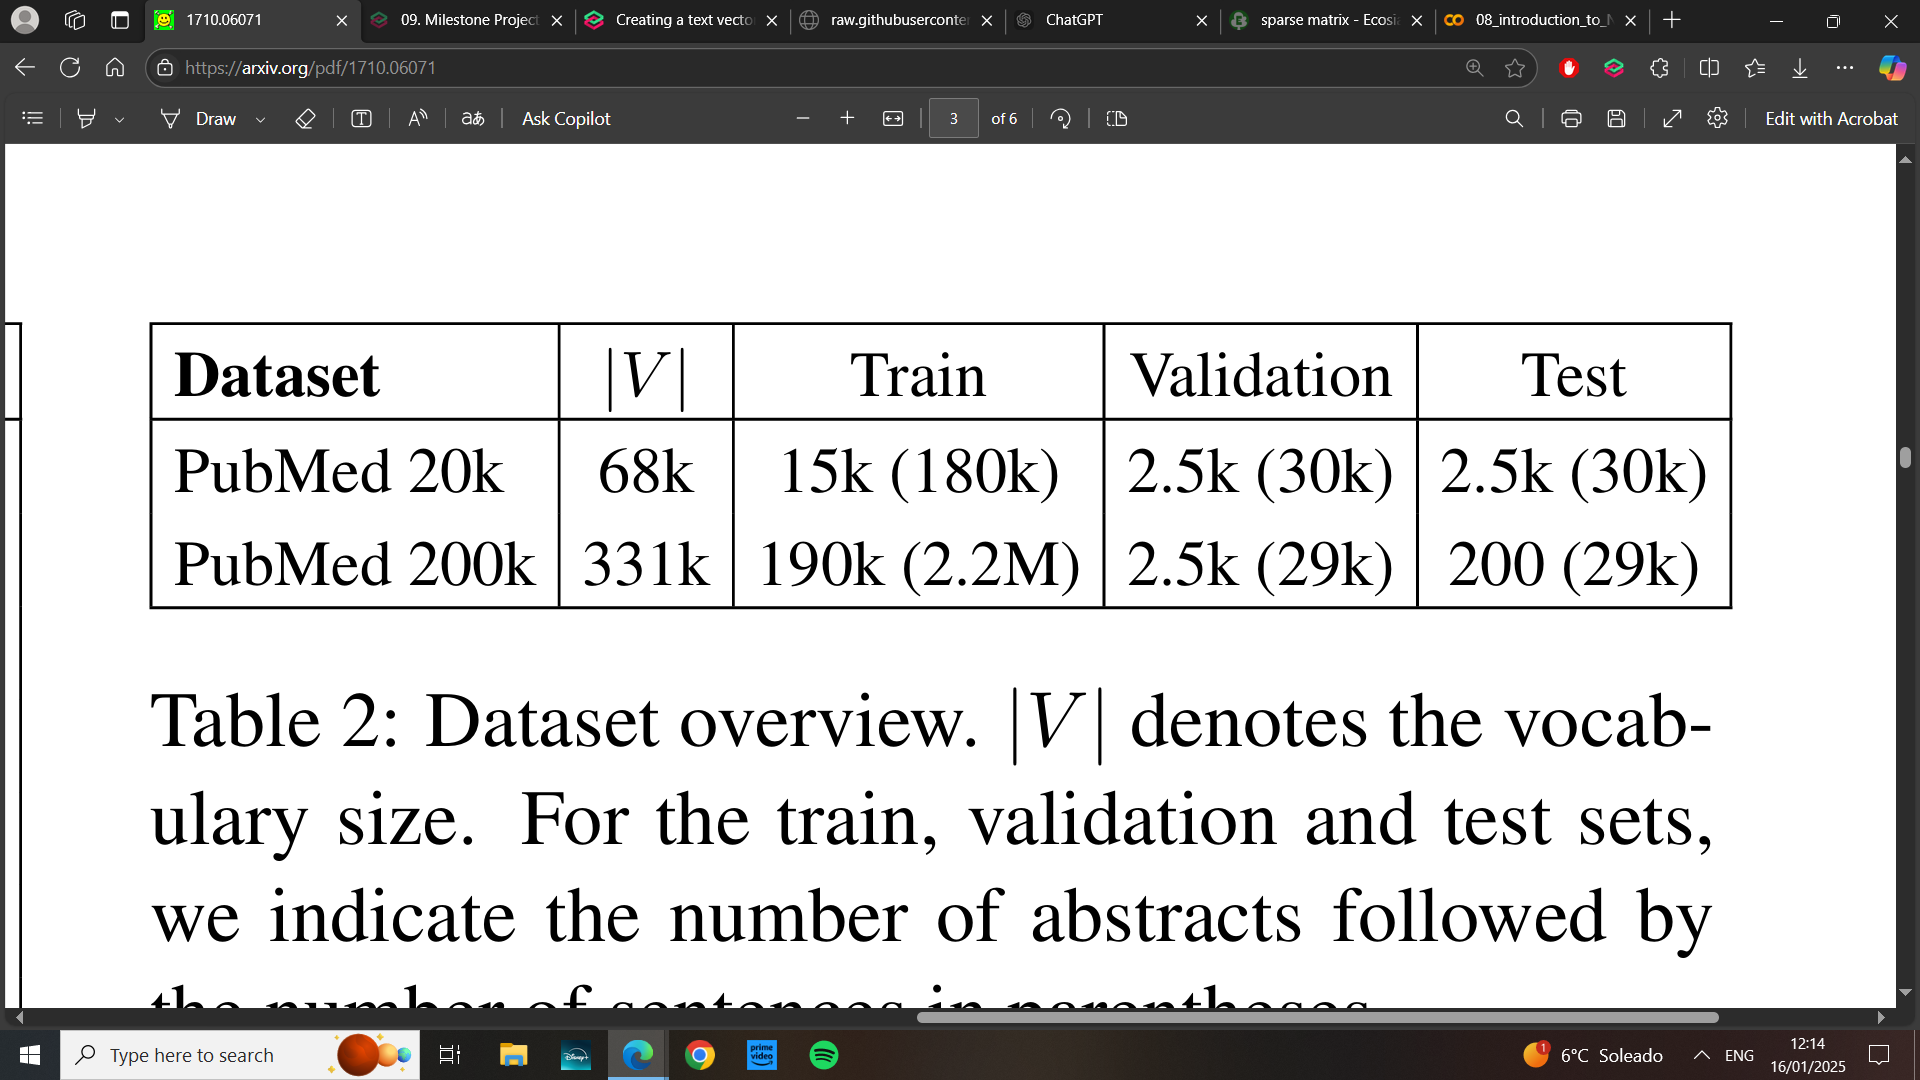

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

# Set up text vectorization variables
max_tokens = 68000 #taken from table 2 from the paper (image above)
text_vectorizer = TextVectorization(max_tokens = max_tokens,
                                    output_sequence_length = output_seq_len)

In [ ]:
# Fit the text vectorizer to training text
text_vectorizer.adapt(train_sentences)

We adapt it to the training data, and then we can fit it later on to our validation and test data.

In [ ]:
# Test out text vectorizer
import random
target_sentence = random.choice(train_sentences)
print(f"Text:\n{target_sentence}")
print(f"\nLength of text: {len(target_sentence.split())}")
print(f"\nVectorized text:\n{text_vectorizer([target_sentence])}")

Text:
hence , these two approaches of anesthesia deserve to be recommended practically .

Length of text: 13

Vectorized text:
[[ 3478   111    51  1326     4   435 15052     6    36   730 16714     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]]


In [ ]:
# How many words in our training vocabulary?
rct_20k_text_vocab = text_vectorizer.get_vocabulary()
print(f"Number of words in vocab: {len(rct_20k_text_vocab)}")
print(f"Most common words in the vocab: {rct_20k_text_vocab[:5]}")
print(f"Least commom words in the vocab: {rct_20k_text_vocab[-5:]}")

Number of words in vocab: 64841
Most common words in the vocab: ['', '[UNK]', 'the', 'and', 'of']
Least commom words in the vocab: ['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


In [ ]:
# GEt the config of our text vectorizer
text_vectorizer.get_config()

{'name': 'text_vectorization',
 'trainable': True,
 'dtype': 'string',
 'batch_input_shape': (None,),
 'max_tokens': 68000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None,
 'encoding': 'utf-8',
 'vocabulary_size': 64841}

### Create an Embedding layer

In [ ]:
from tensorflow.keras import layers
#Create token embedding layer
token_embed = layers.Embedding(input_dim = len(rct_20k_text_vocab), #len of our vocabulary
                              output_dim = 128, #different embedding sizes result in drastically different numbers of parameters to train
                              mask_zero = True, #use masking to handle variable sequence lengths (save space)
                              name="token_embedding")


In [ ]:
# show example embedding
print(f"Sentence before vectorization:\n{target_sentence}\n")
vectorized_sentence = text_vectorizer([target_sentence])
print(f"Sentence after vectorization (before embedding):\n{vectorized_sentence}\n")
embedded_sentence = token_embed(vectorized_sentence)
print(f"Sentence after embedding:\n{embedded_sentence}\n")
print(f"Embedded sentence shape: {embedded_sentence.shape}")

Sentence before vectorization:
hence , these two approaches of anesthesia deserve to be recommended practically .

Sentence after vectorization (before embedding):
[[ 3478   111    51  1326     4   435 15052     6    36   730 16714     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]]

Sentence after embedding:
[[[ 0.03935004 -0.0215999  -0.04140457 ... -0.01598923  0.00353443
    0.01217311]
  [ 0.01056802  0.03978748 -0.01782391 ... -0.04502789  0.00963757
    0.03198654]
  [ 0.00200129 -0.03926438 -0.03303752 ...  0.01498718 -0.02202228
    0.00705174]
  ...
  [-0.0360714  -0.03392859  0.01217017 ... -0.04877074 -0.02571546
    0.00988806]
  [-0.0360714  -0.03392859  0.01217017 ... -0.04877074 -0.02571546
    0.00988806]
  [-0.0360714  -0.03392859  0.01217017 ... -0.

## Creating datasets (making sure our data loads as fast as possible)

We're going to setup our data to run as fast as possible with the TensorFlow tf.data API, many of the steps here are discussed at length in these two resources:
* https://www.tensorflow.org/guide/data
* https://www.tensorflow.org/guide/data_performance

The main steps we'll want to use with our data is to turn it into a `PrefetchDataset` of batches.

To create a batched `PrefetchDataset` we can use the methods `batch()` and `prefetch()`, the parameter `tf.data.AUTOTUNE` will also allow TensorFlow to determine the optimal amount of compute to use to prepare datasets.

In [ ]:
# Turn our data into TensoFlow Datasets
train_dataset= tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
valid_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))

train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [ ]:
# Take the TensorSliceDataset's and turn them into prefected datasets
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

## Model 1: Conv1D with token embeddings

In [ ]:
# Create a tensorboard callback
from helper_functions import create_tensorboard_callback

# Create a tensorboar callback
SAVE_DIR = "model_logs"

In [ ]:
# Create 1D convolutional model to process sequences
inputs = layers.Input(shape=(1,), dtype=tf.string)
text_vectors = text_vectorizer(inputs) # vectorize text inputs
token_embeddings = token_embed(text_vectors) # create embedding
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(token_embeddings)
x = layers.GlobalAveragePooling1D()(x) # condense the output of our feature vector
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_1 = tf.keras.Model(inputs, outputs)

# Compile
model_1.compile(loss="categorical_crossentropy", # if your labels are integer form (not one hot) use sparse_categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
model_1_history = model_1.fit(train_dataset,
                              steps_per_epoch=int(0.1 * len(train_dataset)), # only fit on 10% of batches for faster training time
                              epochs=3,
                              validation_data=valid_dataset,
                              validation_steps=int(0.1 * len(valid_dataset))) # only validate on 10% of batches

Epoch 1/3
562/562 [==============================] - 20s 31ms/step - loss: 0.9318 - accuracy: 0.6267 - val_loss: 0.6979 - val_accuracy: 0.7367
Epoch 2/3
562/562 [==============================] - 6s 10ms/step - loss: 0.6660 - accuracy: 0.7503 - val_loss: 0.6348 - val_accuracy: 0.7686
Epoch 3/3
562/562 [==============================] - 4s 7ms/step - loss: 0.6217 - accuracy: 0.7745 - val_loss: 0.5985 - val_accuracy: 0.7839


In [ ]:
model_1.evaluate(valid_dataset)

945/945 [==============================] - 4s 4ms/step - loss: 0.6003 - accuracy: 0.7837


[0.600299060344696, 0.7836621403694153]

In [ ]:
# Make predictions
model_1_preds_probs = model_1.predict(valid_dataset)
model_1_preds_probs[:10]

945/945 [==============================] - 2s 2ms/step


array([[3.90996397e-01, 1.77211449e-01, 1.04213648e-01, 3.01662117e-01,
        2.59164013e-02],
       [4.79117244e-01, 2.48216629e-01, 1.13925468e-02, 2.56016731e-01,
        5.25682885e-03],
       [1.69844151e-01, 8.62565730e-03, 1.80810562e-03, 8.19683969e-01,
        3.81545942e-05],
       [8.33805825e-06, 4.03760321e-04, 9.79207039e-01, 1.12518883e-05,
        2.03696787e-02],
       [8.54448066e-04, 4.31663245e-02, 3.32237959e-01, 9.91401612e-04,
        6.22749925e-01],
       [1.53153511e-02, 3.09821647e-02, 5.69723964e-01, 9.32339579e-03,
        3.74655038e-01],
       [1.84773424e-04, 3.86923295e-03, 2.71881193e-01, 1.80626259e-04,
        7.23884106e-01],
       [2.31642090e-02, 2.78412774e-02, 6.65390193e-01, 1.50451185e-02,
        2.68559188e-01],
       [9.39915666e-14, 3.40029196e-08, 1.87082065e-07, 2.30845643e-13,
        9.99999762e-01],
       [7.27901282e-03, 6.75612450e-01, 4.82192785e-02, 2.05492247e-02,
        2.48340160e-01]], dtype=float32)

In [ ]:
#Convert predictions to classes
model_1_preds = tf.argmax(model_1_preds_probs, axis=1)
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 3, 2, 4, 2, 4, 2, 4, 1])>

In [ ]:
# Calculate model_1 results
model_1_results = calculate_results(y_true=np.array(val_labels_encoded),
                                    y_pred=np.array(model_1_preds))
model_1_results

{'accuracy': 78.36621210115186,
 'precision': 0.7800407858471736,
 'recall': 0.7836621210115186,
 'f1': 0.7809953951477403}

In [ ]:
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

## Model 2: Feature extraction with pretrained token embeddings

Now lets use pretrained word embedding from TensorFlow Hub, more specifically the universal sentence enconder (USE): https://tfhub.dev/google/universal-sentence-encoder/4

The paper originally used GloVe embeddings, however, we're going to stick with the later created USE pretrained embeddings.

In [ ]:
import tensorflow_hub as hub
tf_hub_embedding = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                  trainable= False,
                                  name = "universal_sentence_enconder")

In [ ]:
# Test out the embedding on a random sentence
random_training_sentence = random.choice(train_sentences)
print(f"Random training sentence:\n{random_training_sentence}\n")
use_embedded_sentence = tf_hub_embedding([random_training_sentence])
print(f"Sentence after embedding:\n{use_embedded_sentence[0][:30]} (truncated output)...\n")
print(f"Length of sentence embedding:\n{len(use_embedded_sentence[0])}")

Random training sentence:
in the intention-to-treat ( itt ) population , pfs was not significantly different .

Sentence after embedding:
[-0.0765563   0.02186131  0.00558863 -0.03131356  0.04855744  0.02630945
  0.07141883 -0.0269934   0.0043814   0.04371091  0.04154368  0.06974105
  0.0402678   0.04589749  0.00950482  0.01856948  0.03221584 -0.02811946
  0.01185035 -0.04254952 -0.01015752  0.04759637 -0.00773839 -0.03291027
 -0.01941838  0.03506353  0.07197537  0.07730398  0.03203157  0.0193179 ] (truncated output)...

Length of sentence embedding:
512


In [ ]:
# Create model
inputs = layers.Input(shape=[], dtype=tf.string)
pre_trained_embedding= tf_hub_embedding(inputs)
x = layers.Dense(128, activation="relu")(pre_trained_embedding)
outputs = layers.Dense(5, activation="softmax")(x)
model_2 = tf.keras.Model(inputs, outputs)

# Compile the model
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
model_2_history = model_2.fit(train_dataset,
                              steps_per_epoch=int(0.1 * len(train_dataset)), # only fit on 10% of batches for faster training time
                              epochs=3,
                              validation_data=valid_dataset,
                              validation_steps=int(0.1 * len(valid_dataset))) # only validate on 10% of batches

Epoch 1/3
562/562 [==============================] - 12s 15ms/step - loss: 0.9179 - accuracy: 0.6478 - val_loss: 0.7994 - val_accuracy: 0.6895
Epoch 2/3
562/562 [==============================] - 7s 12ms/step - loss: 0.7719 - accuracy: 0.7012 - val_loss: 0.7590 - val_accuracy: 0.7025
Epoch 3/3
562/562 [==============================] - 8s 14ms/step - loss: 0.7566 - accuracy: 0.7094 - val_loss: 0.7449 - val_accuracy: 0.7121


In [ ]:
# Make predictions
model_2_pred_probs = model_2.predict(valid_dataset)
model_2_preds = tf.argmax(model_2_pred_probs, axis=1)
model_2_preds[:10]

945/945 [==============================] - 11s 11ms/step


<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 1, 3, 2, 4, 2, 2, 4, 4, 1])>

In [ ]:
model_2_results = calculate_results(np.array(val_labels_encoded),
                                    np.array(model_2_preds))
model_2_results


{'accuracy': 71.12405666622534,
 'precision': 0.7119339966859641,
 'recall': 0.7112405666622534,
 'f1': 0.7082983086153314}

## Model 3: Conv1D with character embeddings

The paper which we're replicating states they used a combination of token and character-level embeddings.

Previously we've made token-level embeddings (encoding each different word into an integer) but we'll need to do similar steps for characters if we want to use char-level embeddings (encode each character into a feature vector).


### Creating a character-level tokenizer

In [ ]:
train_sentences[:5]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .']

In [ ]:
# Make function to split sentences into characters
def split_chars(text):
  return " ".join(list(text))

  # Text splitting non-character level sequence into char
  split_chars(random_training_sentence)

In [ ]:
# Split sequence-level data splits into character-level data splits
train_chars = [split_chars(sentence) for sentence in train_sentences]
val_chars = [split_chars(sentence) for sentence in val_sentences]
test_chars = [split_chars(sentence) for sentence in test_sentences]
print(train_chars[0])

t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .


In [ ]:
# What's the average character length?
char_lens = [len(sentence) for sentence in train_sentences]
mean_char_len = np.mean(char_lens)
mean_char_len

149.3662574983337

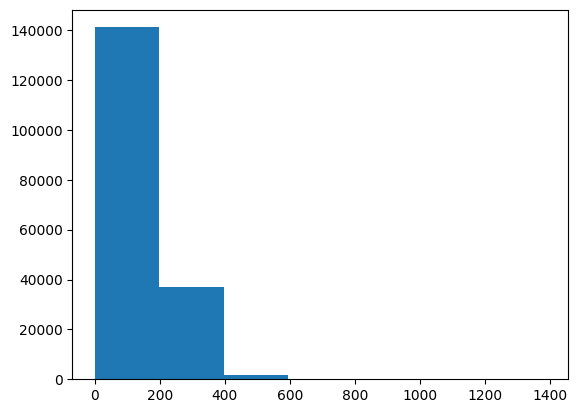

In [ ]:
# Check the distribution of our sequences at a character-level
import matplotlib.pyplot as plt
plt.hist(char_lens, bins=7);

In [ ]:
# Find what char length covers 95% of sequences
output_seq_char_len = int(np.percentile(char_lens,95))
output_seq_char_len

290

In [ ]:
# Get all keyboard characters
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# Create char-level token vectorizer instance
NUM_CHAR_TOKENS = len(alphabet) + 2 #add 2 por space and OVV token (OVV=out of vocab ["UNK"])
char_vectorizer = TextVectorization(max_tokens=NUM_CHAR_TOKENS,
                                    output_sequence_length = output_seq_char_len,
                                    #standardize=None,
                                    name="char_vectorizer")

In [ ]:
# Adapt character vectorizer to training character
char_vectorizer.adapt(train_chars)

In [ ]:
# Check character vocab stats
char_vocab = char_vectorizer.get_vocabulary()
print(f"Number of characters in vocab: {len(char_vocab)}")
print(f"5 most common characters in vocab:\n{char_vocab[:5]}")
print(f"5 least common characters in vocab:\n{char_vocab[-5:]}")

Number of characters in vocab: 28
5 most common characters in vocab:
['', '[UNK]', 'e', 't', 'i']
5 least common characters in vocab:
['k', 'x', 'z', 'q', 'j']


In [ ]:
# Test out character vectorizer
random_train_chars = random.choice(train_chars)
print(f"Charified text:\n{random_train_chars}")
print(f"\nLength of chars: {len(random_train_chars.split())}")
vectorized_chars = char_vectorizer([random_train_chars])
print(f"\nVectorized chars:\n{vectorized_chars}")
print(f"\nLength of vectorized chars: {len(vectorized_chars[0])}")

Charified text:
a t   w e e k   @   ,   @ / @   a z a t h i o p r i n e   p a t i e n t s   a n d   @ / @   t w h f   p a t i e n t s   h a d   c l i n i c a l   r e c u r r e n c e   (   p   =   @   )   .

Length of chars: 76

Vectorized chars:
[[ 5  3 20  2  2 23  5 25  5  3 13  4  7 14  8  4  6  2 14  5  3  4  2  6
   3  9  5  6 10  3 20 13 17 14  5  3  4  2  6  3  9 13  5 10 11 12  4  6
   4 11  5 12  8  2 11 16  8  8  2  6 11  2 14  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0 

### Creating a character-level embedding

In [ ]:
# Create char embedding layer
char_embed = layers.Embedding(input_dim=len(char_vocab), #number of different characters
                              output_dim = 25, # size of the embedding in the paper: https://arxiv.org/pdf/1612.05251
                              mask_zero = True,
                              name = "char_embedding")

In [ ]:
# Test our character embedding layer
print(f"Charified text:\n {random_train_chars}\n")
char_embed_example = char_embed(char_vectorizer([random_train_chars]))
print(f"Embedded chars (after vectorization and embedding):\n {char_embed_example}\n")
print(f"Character embedding shape: {char_embed_example.shape}")

Charified text:
 a t   w e e k   @   ,   @ / @   a z a t h i o p r i n e   p a t i e n t s   a n d   @ / @   t w h f   p a t i e n t s   h a d   c l i n i c a l   r e c u r r e n c e   (   p   =   @   )   .

Embedded chars (after vectorization and embedding):
 [[[ 0.02951939  0.03261476  0.02480147 ...  0.02323179 -0.03899788
    0.03241345]
  [-0.02405543 -0.00899128  0.02010986 ... -0.00208939  0.04304704
   -0.00197214]
  [ 0.00574942  0.01370055  0.01399605 ... -0.02364662  0.02875367
   -0.02727356]
  ...
  [-0.03236209  0.04147318 -0.03325341 ... -0.02814772 -0.03669327
    0.03524427]
  [-0.03236209  0.04147318 -0.03325341 ... -0.02814772 -0.03669327
    0.03524427]
  [-0.03236209  0.04147318 -0.03325341 ... -0.02814772 -0.03669327
    0.03524427]]]

Character embedding shape: (1, 290, 25)


### Building a Conv1D model to fit on character embeddings

In [ ]:
# Create 1D convolutional model to process sequences
inputs = layers.Input(shape=(1,), dtype="string")
char_vectors = char_vectorizer(inputs)
char_embeddings = char_embed(char_vectors)
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(char_embeddings)
x = layers.GlobalMaxPooling1D()(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_conv1d_char_embedding")

# Compile
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_3.summary()

Model: "model_3_conv1d_char_embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 char_vectorizer (TextVecto  (None, 290)               0         
 rization)                                                       
                                                                 
 char_embedding (Embedding)  (None, 290, 25)           700       
                                                                 
 conv1d_1 (Conv1D)           (None, 290, 64)           8064      
                                                                 
 global_max_pooling1d (Glob  (None, 64)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense_3 (Dense)             (None, 5

In [ ]:
# We need to prefetch datasets
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars, val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
test_char_dataset = tf.data.Dataset.from_tensor_slices((test_chars, test_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
# Fit the model
model_3_history = model_3.fit(train_char_dataset,
                              steps_per_epoch=int(0.1 * len(train_char_dataset)), # only fit on 10% of batches for faster training time
                              epochs=3,
                              validation_data=val_char_dataset,
                              validation_steps=int(0.1 * len(val_char_dataset))) # only validate on 10% of batches

Epoch 1/3
562/562 [==============================] - 6s 8ms/step - loss: 1.2604 - accuracy: 0.4873 - val_loss: 1.0459 - val_accuracy: 0.5848
Epoch 2/3
562/562 [==============================] - 3s 5ms/step - loss: 1.0163 - accuracy: 0.5936 - val_loss: 0.9596 - val_accuracy: 0.6197
Epoch 3/3
562/562 [==============================] - 3s 5ms/step - loss: 0.9446 - accuracy: 0.6324 - val_loss: 0.8871 - val_accuracy: 0.6566


In [ ]:
# Make some predictions
model_3_pred_probs = model_3.predict(val_char_dataset)
model_3_pred_probs[:10]
# Convert them to labels
model_3_preds = tf.argmax(model_3_pred_probs, axis=1)
model_3_preds[:10]

945/945 [==============================] - 3s 3ms/step


<tf.Tensor: shape=(10,), dtype=int64, numpy=array([3, 1, 1, 2, 2, 2, 2, 1, 4, 2])>

In [ ]:
# Evaluate resuls
model_3_results = calculate_results(y_true=np.array(val_labels_encoded),
                                    y_pred=np.array(model_3_preds))
model_3_results

{'accuracy': 64.91129352575136,
 'precision': 0.6417869323389952,
 'recall': 0.6491129352575136,
 'f1': 0.6394945827248059}

You can try to change AverageMAxPool for GlobalMAxPool to see if that increase the accuracy

## Model 4: Combining pretrained token embeddings + character embeddings (hybrid embedding layer)

1. Create a token-level embedding model (similar `model_1`)
2. Create a character-level model (similar to `model_3` with a slight modification)
3. Combine 1 & 2 with concatenate (`layers.Concatenate`)
4. Build a series of output layers on top of 3 similar to Figure 1 and section 4.2 of https://arxiv.org/pdf/1612.05251
5. Construct a model which takes token anc character-level sequences as input and produces sequence label probabilities as output.

In [ ]:
# 1. Set up token inputs/model
token_inputs = layers.Input(shape=[], dtype=tf.string, name="token_input")
token_embeddings = tf_hub_embedding(token_inputs)
token_outputs = layers.Dense(128, activation = "relu")(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs,
                             outputs = token_outputs)

# 2. Set up char inputs/model
char_inputs = layers.Input(shape=(1,), dtype="string", name="char_input")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(24))(char_embeddings) # bi-LSTM shown in Figure 1 of https://arxiv.org/pdf/1612.05251
char_model = tf.keras.Model (inputs=char_inputs,
                             outputs = char_bi_lstm)

# 3. Concatenate token and char inputs (create hybrid token embedding)
token_char_concat = layers.Concatenate(name="token_char_hybrid")([token_model.output,
                                                                  char_model.output])

# 4. Create output layers - adding in Dropout, discussed in section 4.2 of https://arxiv.org/pdf/1612.05251
combined_dropout = layers.Dropout(0.5)(token_char_concat)
combined_dense = layers.Dense(128, activation="relu")(combined_dropout)
final_dropout = layers.Dropout(0.5)(combined_dense)
output_layer = layers.Dense(num_classes, activation="softmax")(final_dropout)

# 5. Construct model with char and token inputs
model_4 = tf.keras.Model(inputs=[token_model.input,char_model.input ],
                         outputs=output_layer,
                         name="model_4_token_and_char_embeddings")


In [ ]:
model_4.summary()

Model: "model_4_token_and_char_embeddings"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 char_input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 token_input (InputLayer)    [(None,)]                    0         []                            
                                                                                                  
 char_vectorizer (TextVecto  (None, 290)                  0         ['char_input[0][0]']          
 rization)                                                                                        
                                                                                                  
 universal_sentence_enconde  (None, 512)                  2567978 

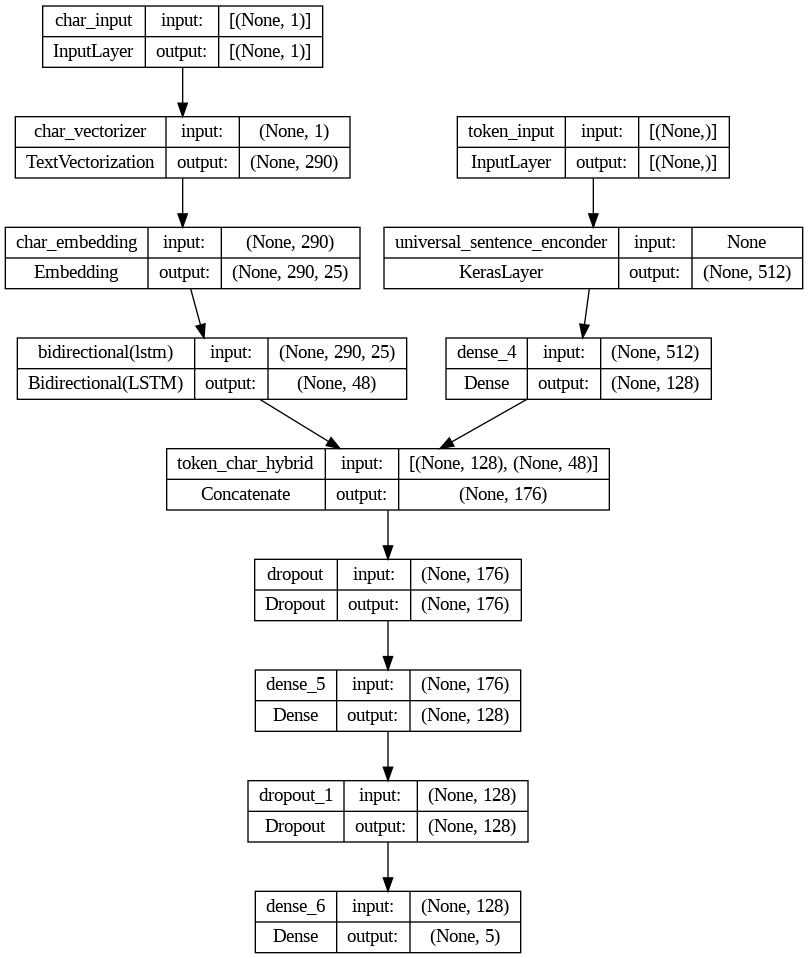

In [ ]:
# Plot hybrid token and character model
from keras.utils import plot_model
plot_model(model_4,show_shapes=True)

In [ ]:
# Compile token char model
model_4.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(), # section 4.2 of the paper says they used GSD()
                metrics=["accuracy"])

### Combining token and character dat into a tf.data Dataset

In [ ]:
# Combine chars and tokens into a dataset
train_char_token_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars)) # make data
train_char_token_labels= tf.data.Dataset.from_tensor_slices((train_labels_one_hot)) # make lables
train_char_token_dataset = tf.data.Dataset.zip((train_char_token_data, train_char_token_labels)) #combine data and labels

# Prefetch and batch train data
train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)



In [ ]:
# Repeat the above stepes for our validation data
val_char_token_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars)) # make data
val_char_token_labels= tf.data.Dataset.from_tensor_slices((val_labels_one_hot)) # make lables
val_char_token_dataset = tf.data.Dataset.zip((val_char_token_data, val_char_token_labels)) #combine data and labels
val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
# Check out our training char and token embeddind dataset
train_char_token_dataset, val_char_token_dataset

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

In [ ]:
model_4_history = model_4.fit(train_char_token_dataset,
                              steps_per_epoch = (0.1 * len(train_char_token_dataset)),
                              epochs = 3,
                              validation_data = val_char_token_dataset,
                              validation_steps= int(0.1 * len(val_char_token_dataset)))

Epoch 1/3
562/562 [==============================] - 41s 51ms/step - loss: 0.9864 - accuracy: 0.6052 - val_loss: 0.7867 - val_accuracy: 0.7025
Epoch 2/3
562/562 [==============================] - 25s 44ms/step - loss: 0.8011 - accuracy: 0.6884 - val_loss: 0.7150 - val_accuracy: 0.7264
Epoch 3/3
562/562 [==============================] - 23s 40ms/step - loss: 0.7743 - accuracy: 0.7038 - val_loss: 0.6883 - val_accuracy: 0.7340


In [ ]:
# Evaluate on the whole model
model_4.evaluate(val_char_token_dataset)

945/945 [==============================] - 18s 19ms/step - loss: 0.6939 - accuracy: 0.7352


[0.6938762068748474, 0.7352376580238342]

In [ ]:
# Make predictions
model_4_pred_probs = model_4.predict(val_char_token_dataset)
model_4_pred_probs

945/945 [==============================] - 21s 20ms/step


array([[4.1324335e-01, 3.6703455e-01, 6.4701806e-03, 2.0337290e-01,
        9.8790191e-03],
       [3.0420476e-01, 5.2047622e-01, 5.0689918e-03, 1.6705291e-01,
        3.1971682e-03],
       [2.4853495e-01, 6.7805588e-02, 5.5960875e-02, 5.9955382e-01,
        2.8144833e-02],
       ...,
       [4.4436043e-04, 6.6486467e-03, 6.4779319e-02, 2.2084417e-04,
        9.2790681e-01],
       [4.8488216e-03, 4.7060415e-02, 1.8609281e-01, 2.2813722e-03,
        7.5971657e-01],
       [3.6344630e-01, 2.5339672e-01, 3.1626225e-01, 3.3825234e-02,
        3.3069495e-02]], dtype=float32)

In [ ]:
# Turn predictions into probababilites clases
model_4_preds = tf.argmax(model_4_pred_probs, axis=1)
model_4_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 0])>

In [ ]:
#Calculate resutls
model_4_results = calculate_results(y_true=np.array(val_labels_encoded),
                                    y_pred=np.array(model_4_preds))
model_4_results

{'accuracy': 73.52376539123527,
 'precision': 0.7342310408273769,
 'recall': 0.7352376539123527,
 'f1': 0.7314230068877806}

In [ ]:
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

## Model 5: Transfer Learning with pretrained token embeddings + character embeddings + positional embeddings

In [ ]:
train_df.head()

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11


> 🔑**Note:** Any engineered features used to train a model need to be available at test time. In our case, line numbers ant total lines are available.

### Create positional embeddings

In [ ]:
# How many different line numbers are there?
train_df["line_number"].value_counts()

,count
line_number,
0,15000
1,15000
2,15000
3,15000
4,14992
5,14949
6,14758
7,14279
8,13346


<Axes: ylabel='Frequency'>

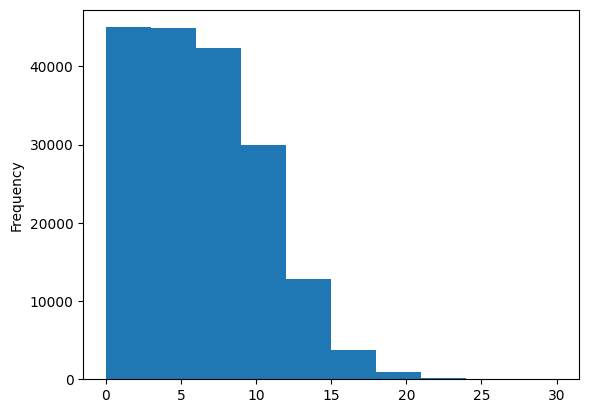

In [ ]:
# Check the distribution of "line_number" column
train_df.line_number.plot.hist()

In [ ]:
# Use TensorFlow to create one-hot-encode tensors of our "line_number" column
train_line_numbers_one_hot = tf.one_hot(train_df["line_number"].to_numpy(), depth=15)
val_line_numbers_one_hot = tf.one_hot(val_df["line_number"].to_numpy(), depth=15)
test_line_numbers_one_hot = tf.one_hot(test_df["line_number"].to_numpy(), depth=15)

train_line_numbers_one_hot[:10], train_line_numbers_one_hot.shape


# We put depth=15 because we don't want really long tensors.
# Almost all of our numbers are between 0-15 (see the graphic above)

(<tf.Tensor: shape=(10, 15), dtype=float32, numpy=
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]],
       dtype=float32)>,
 TensorShape([180040, 15]))

In [ ]:
# How many different total line numbers are there?
train_df["total_lines"].value_counts()

,count
total_lines,
11,24468
10,23639
12,22113
9,19400
13,18438
14,14610
8,12285
15,10768
7,7464


<Axes: ylabel='Frequency'>

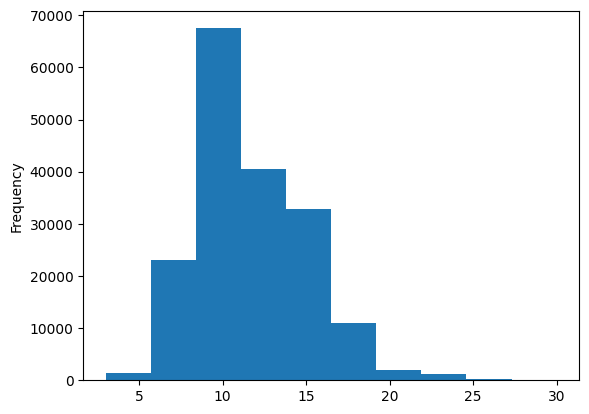

In [ ]:
# Check the distribution of "total_lines" column
train_df.total_lines.plot.hist()

In [ ]:
# Use TensorFlow to create one-hot enconded tensors of our "total_lines" column
train_total_lines_one_hot = tf.one_hot(train_df["total_lines"].to_numpy(), depth=20)
val_total_lines_one_hot = tf.one_hot(val_df["total_lines"].to_numpy(), depth=20)
test_total_lines_one_hot = tf.one_hot(test_df["total_lines"].to_numpy(), depth=20)

# Check shape and samples of totla lines
train_total_lines_one_hot[:10], train_total_lines_one_hot.shape

(<tf.Tensor: shape=(10, 20), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0

### Building a tribrid embedding model

1. Create a token-level model
2. Create a character-level model
3. Create a model for the "line_number" feature
4. Create a model for the "total_lines" feature
5. Combine the outputs of 1 & 2 using `tf.keras.layers.Concatenate`
6. Combine the outputs of 3, 4, 5 using `tf.keras.layers.Concatenate`
7. Create an output layer to accept the tribried embbeding and output label probabilites
8. Combine the inputs of 1, 2, 3, 4 and outputs of 7 into a `tf.keras.Model`

In [ ]:
# 1. Token inputs
token_inputs = layers.Input(shape=[],dtype="string", name="token_inputs")
token_embeddings = tf_hub_embedding(token_inputs)
token_outputs = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs,
                             outputs= token_outputs)

# 2. Char inputs
char_inputs = layers.Input(shape=(1,),dtype="string", name="char_inputs")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(24))(char_embeddings)
char_model = tf.keras.Model(inputs=char_inputs,
                            outputs=char_bi_lstm)

# 3. Line numbers model
line_number_inputs = layers.Input(shape=(15,), dtype=tf.float32, name="line_number_inputs")
x =layers.Dense(32, activation="relu")(line_number_inputs)
line_number_model = tf.keras.Model(inputs = line_number_inputs,
                                   outputs = x)

# 4. Total lines model
total_lines_inputs = layers.Input(shape=(20,), dtype=tf.float32, name="total_line_inputs")
y = layers.Dense(32, activation="relu")(total_lines_inputs)
total_lines_model = tf.keras.Model(inputs = total_lines_inputs,
                                  outputs = y)

# 5. Combine token and char embeddings into a hybrid embedding
combined_embeddings = layers.Concatenate(name="char_token_hybrid_embedding")([token_model.output,
                                                                             char_model.output])
# Dropout
z = layers.Dense(256, activation="relu")(combined_embeddings)
z = layers.Dropout(0.5)(z)

# 6. Combine positional embedding with combined token and char embeddings
tribid_embedding = layers.Concatenate(name="tribid_embedding")([line_number_model.output,
                                                                total_lines_model.output,
                                                                z])

# 7. Create output layer
output_layer = layers.Dense(5, activation="softmax", name="output_layer")(tribid_embedding)

# 8 . Put together model with all kinds of inputs
model_5 = tf.keras.Model(inputs=[line_number_model.input,
                                 total_lines_model.input,
                                 token_model.input,
                                 char_model.input],
                         outputs = output_layer,
                         name = "model_5_tribrid_embedding_model")

In [ ]:
# Get a summary of our tribrid embedding model
model_5.summary()

Model: "model_5_tribrid_embedding_model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 char_inputs (InputLayer)    [(None, 1)]                  0         []                            
                                                                                                  
 token_inputs (InputLayer)   [(None,)]                    0         []                            
                                                                                                  
 char_vectorizer (TextVecto  (None, 290)                  0         ['char_inputs[0][0]']         
 rization)                                                                                        
                                                                                                  
 universal_sentence_enconde  (None, 512)                  2567978   

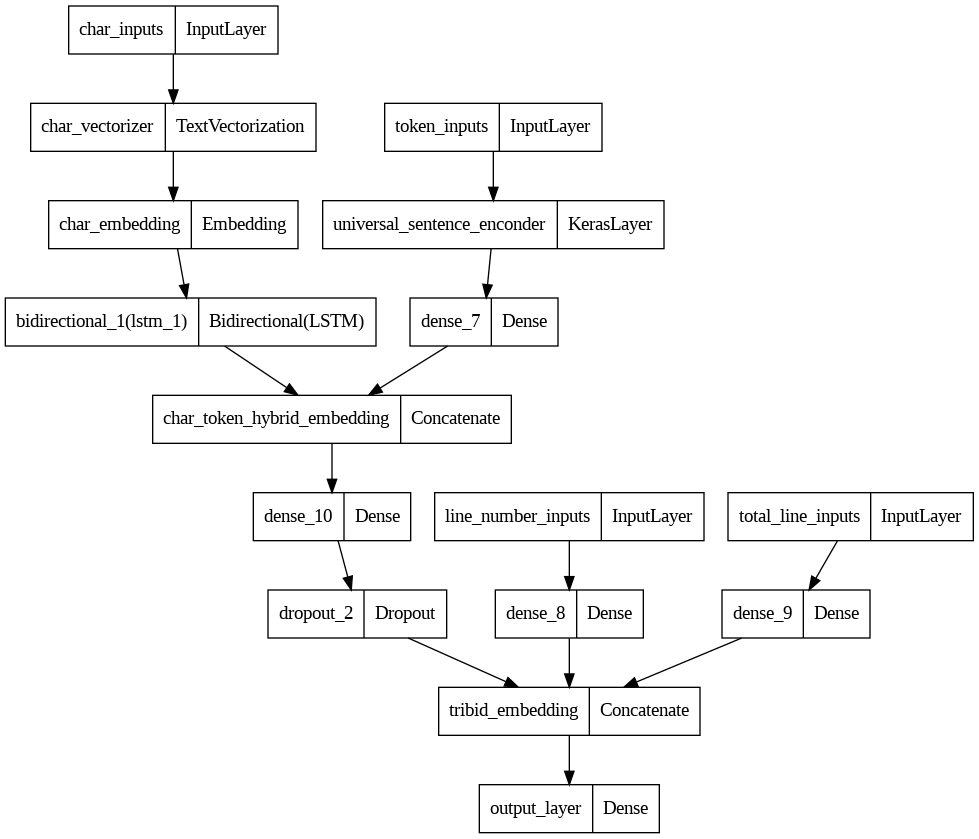

In [ ]:
# Plot hmodel_5 to explore it visually
from keras.utils import plot_model
plot_model(model_5)

What is label smoothing?

For example, if our model gets too confident on a single class (e.g. its prediction probability is really high), it may get stuck on that class and not consider other classes...

Really confident: `[0.0, 0.0, 1.0, 0.0, 0.0]`

What label smoothing does is it assigns some of the value from the highest pred prob to other classes, in turn, hopefully improving generalization: `[0.01, 0.01, 0.96, 0.01, 0.01]`

In [ ]:
# Compile token, char, and positional embedding model
model_5.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2), #helps to prevent overfitting
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

### Create tribrid embedding datasets using tf.data.Dataset

In [ ]:
# Create training and validation datasets (all four kinds of inputs)
train_pos_char_token_data = tf.data.Dataset.from_tensor_slices((train_line_numbers_one_hot, # line numbers
                                                                train_total_lines_one_hot, # total lines
                                                                train_sentences, # train tokens
                                                                train_chars)) # train chars
train_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot) # train labels
train_pos_char_token_dataset = tf.data.Dataset.zip((train_pos_char_token_data, train_pos_char_token_labels)) # combine data and labels
train_pos_char_token_dataset = train_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) # turn into batches and prefetch appropriately

# Validation dataset
val_pos_char_token_data = tf.data.Dataset.from_tensor_slices((val_line_numbers_one_hot,
                                                              val_total_lines_one_hot,
                                                              val_sentences,
                                                              val_chars))
val_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_pos_char_token_dataset = tf.data.Dataset.zip((val_pos_char_token_data, val_pos_char_token_labels))
val_pos_char_token_dataset = val_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) # turn into batches and prefetch appropriately

# Check input shapes
train_pos_char_token_dataset, val_pos_char_token_dataset

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

In [ ]:
val_pos_char_token_dataset

<_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

### Fitting, evaluating and making predictions with our tribrid model

In [ ]:
# Fit the token, char and positional embedding model
history_model_5 = model_5.fit(train_pos_char_token_dataset,
                              steps_per_epoch=int(0.1 * len(train_pos_char_token_dataset)),
                              epochs=3,
                              validation_data=val_pos_char_token_dataset,
                              validation_steps=int(0.1 * len(val_pos_char_token_dataset)))

Epoch 1/3
562/562 [==============================] - 39s 50ms/step - loss: 1.0970 - accuracy: 0.7240 - val_loss: 0.9797 - val_accuracy: 0.8078
Epoch 2/3
562/562 [==============================] - 25s 45ms/step - loss: 0.9646 - accuracy: 0.8162 - val_loss: 0.9476 - val_accuracy: 0.8295
Epoch 3/3
562/562 [==============================] - 24s 42ms/step - loss: 0.9486 - accuracy: 0.8246 - val_loss: 0.9351 - val_accuracy: 0.8344


In [ ]:
# Make predictions
model_5_pred_probs = model_5.predict(val_pos_char_token_dataset)
model_5_pred_probs

945/945 [==============================] - 20s 19ms/step


array([[0.49994612, 0.11105858, 0.0112385 , 0.35985023, 0.01790669],
       [0.5596122 , 0.09479574, 0.04107564, 0.29466978, 0.00984667],
       [0.24835859, 0.1022797 , 0.10595964, 0.47722447, 0.06617767],
       ...,
       [0.02899233, 0.09907562, 0.03703851, 0.02682883, 0.8080647 ],
       [0.03446748, 0.3215113 , 0.07413905, 0.02611086, 0.5437713 ],
       [0.16953695, 0.61216   , 0.1067879 , 0.04159727, 0.06991787]],
      dtype=float32)

In [ ]:
# Turn probabilities into prediction classes
model_5_preds = tf.argmax(model_5_pred_probs, axis=1)
model_5_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 4, 1])>

In [ ]:
# Calculate results
model_5_results = calculate_results(y_true=np.array(val_labels_encoded),
                                    y_pred=np.array(model_5_preds))
model_5_results

{'accuracy': 83.43042499669005,
 'precision': 0.8329406809165371,
 'recall': 0.8343042499669006,
 'f1': 0.8333071507380219}

In [ ]:
model_4_results

{'accuracy': 73.52376539123527,
 'precision': 0.7342310408273769,
 'recall': 0.7352376539123527,
 'f1': 0.7314230068877806}

## Compare model results


In [ ]:
# Combine model results into a dataframe
all_model_results = pd.DataFrame({"model_0_baseline": baseline_results,
                                  "model_1_custom_token_embedding": model_1_results,
                                  "model_2_pretrained_token_embedding": model_2_results,
                                  "model_3_custom_char_embedding": model_3_results,
                                  "model_4_hybrid_char_token_embedding": model_4_results,
                                  "model_5_pos_char_token_embedding": model_5_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
model_0_baseline,72.183238,0.718647,0.721832,0.698925
model_1_custom_token_embedding,78.366212,0.780041,0.783662,0.780995
model_2_pretrained_token_embedding,71.124057,0.711934,0.711241,0.708298
model_3_custom_char_embedding,64.911294,0.641787,0.649113,0.639495
model_4_hybrid_char_token_embedding,73.523765,0.734231,0.735238,0.731423
model_5_pos_char_token_embedding,83.430425,0.832941,0.834304,0.833307


In [ ]:
# Reduce the accuracy to same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100

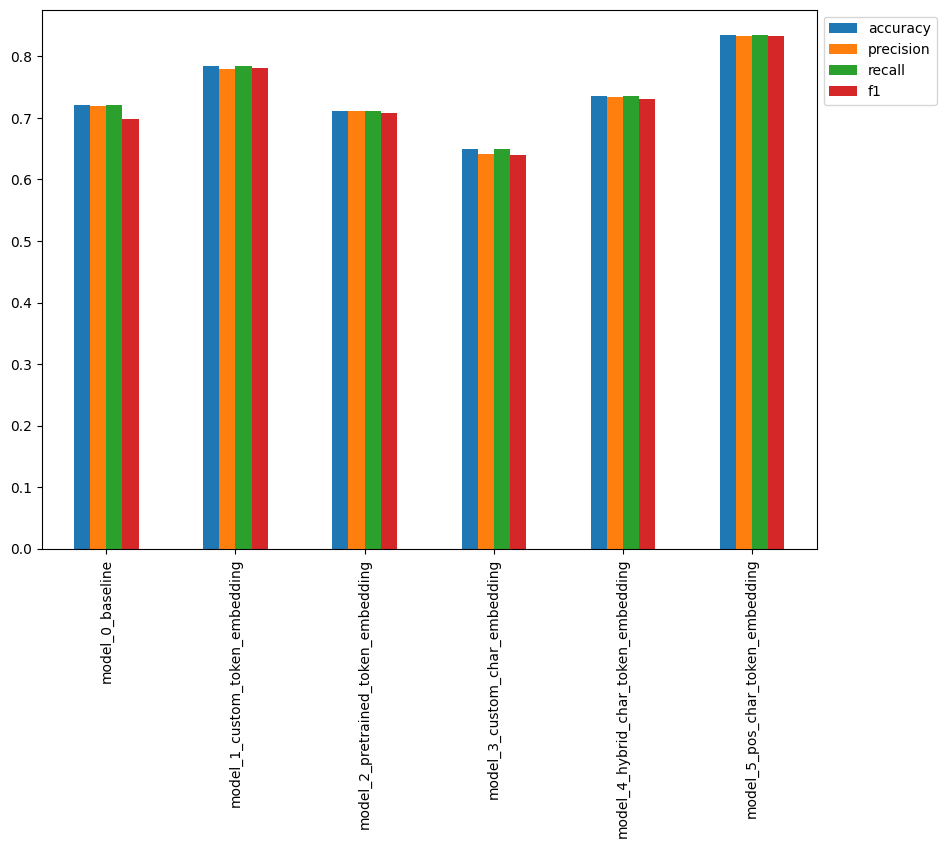

In [ ]:
# Plot and compare all model results
all_model_results.plot(kind="bar", figsize=(10,7)).legend(bbox_to_anchor=(1.0,1.0));

<Axes: >

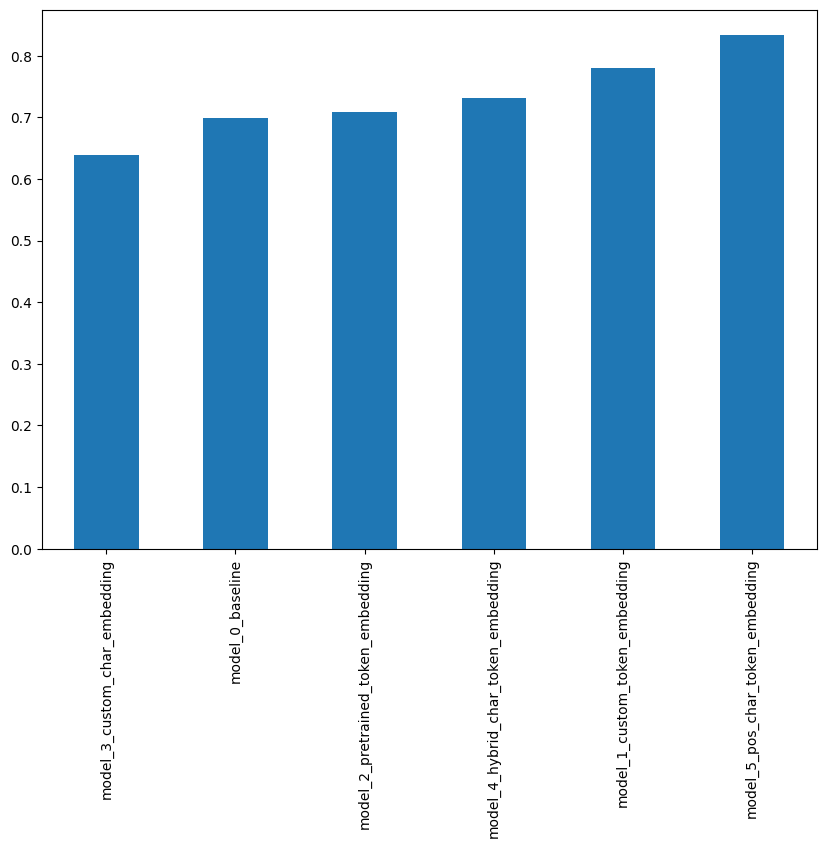

In [ ]:
# Sort models results by f1-score
all_model_results.sort_values("f1", ascending=True)["f1"].plot(kind="bar", figsize=(10,7))

## Save and load model

In [ ]:
# Save a model
model_5.save("model_5_tribrid_embedding_model")

In [ ]:
# Load in best performing model
loaded_model_5 = tf.keras.models.load_model("model_5_tribrid_embedding_model")

In [ ]:
# Make predictions with loaded model
loaded_pred_probs = loaded_model_5.predict(val_pos_char_token_dataset)
loaded_preds = tf.argmax(loaded_pred_probs, axis=1)
loaded_preds[:10]


945/945 [==============================] - 21s 19ms/step


<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 3, 2, 2, 4, 4, 4, 4, 1])>

In [ ]:
# Calculate the results of the loaded model
loaded_results = calculate_results(y_true=np.array(val_labels_encoded),
                                  y_pred=np.array(loaded_preds))
loaded_results

{'accuracy': 83.43042499669005,
 'precision': 0.8329406809165371,
 'recall': 0.8343042499669006,
 'f1': 0.8333071507380219}

In [ ]:
assert model_5_results == loaded_results

In [ ]:
# Check the loaded model summary
loaded_model_5.summary()

Model: "model_5_tribrid_embedding_model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 char_inputs (InputLayer)    [(None, 1)]                  0         []                            
                                                                                                  
 token_inputs (InputLayer)   [(None,)]                    0         []                            
                                                                                                  
 char_vectorizer (TextVecto  (None, 290)                  0         ['char_inputs[0][0]']         
 rization)                                                                                        
                                                                                                  
 universal_sentence_enconde  (None, 512)                  2567978   

## Download and load in a pretrained model from Google Storage

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.layers import TextVectorization

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/skimlit/skimlit_tribrid_model.zip
!mkdir skimlit_gs_model
!unzip skimlit_tribrid_model.zip -d skimlit_gs_model

--2025-01-21 14:27:46--  https://storage.googleapis.com/ztm_tf_course/skimlit/skimlit_tribrid_model.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.207, 142.250.101.207, 142.251.2.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 962182847 (918M) [application/zip]
Saving to: ‘skimlit_tribrid_model.zip’

skimlit_tribrid_mod 100%[===================>] 917.61M  17.4MB/s    in 18s     

2025-01-21 14:28:04 (50.5 MB/s) - ‘skimlit_tribrid_model.zip’ saved [962182847/962182847]

Archive:  skimlit_tribrid_model.zip
   creating: skimlit_gs_model/skimlit_tribrid_model/
  inflating: skimlit_gs_model/skimlit_tribrid_model/keras_metadata.pb  
   creating: skimlit_gs_model/skimlit_tribrid_model/assets/
 extracting: skimlit_gs_model/skimlit_tribrid_model/fingerprint.pb  
   creating: skimlit_gs_model/skimlit_tribrid_model/variables/
  inflating: skimlit_gs_model/sk

In [ ]:
# Load the model
loaded_gs_model = tf.keras.models.load_model("skimlit_gs_model/skimlit_tribrid_model/")

In [ ]:
# Evaluate the loaded model
loaded_gs_model.evaluate(val_pos_char_token_dataset)

945/945 [==============================] - 20s 20ms/step - loss: 0.9388 - accuracy: 0.8303


[0.9387755990028381, 0.830332338809967]

## Your challenges

1. Turn the test data samples into a tf.data Dataset (fast loading) and then evaluate (make predictions) the best performing model on the test samples.

2. Find the most wrong predictions from 1 (theres are the samples where the model has predicted the wrong label with the higest prediction probability)

3. Make example predictions (on RCT abstracts from the wild), you can got to PubMed to find these: https://pubmed.ncbi.nlm.nih.gov/ , find and use our model to predict on 3-4 different abstracts from the wild.
 * some examples: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/skimlit_example_abstracts.json

4. See the exercises and extra curriculum section on GitHub to further test your skilss (for section 09)

In [ ]:
# Create test datasets (all four kinds of inputs)
test_pos_char_token_data = tf.data.Dataset.from_tensor_slices((test_line_numbers_one_hot,
                                                               test_total_lines_one_hot,
                                                               test_sentences,
                                                               test_chars))
test_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_pos_char_token_dataset  = tf.data.Dataset.zip((test_pos_char_token_data, test_pos_char_token_labels))
test_pos_char_token_dataset = test_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
# Evaluate on the test dta set
loaded_model_5.evaluate(test_pos_char_token_dataset)


942/942 [==============================] - 22s 20ms/step - loss: 0.9429 - accuracy: 0.8300


[0.9429441690444946, 0.8299983143806458]

In [ ]:
# Make predictions
test_pred_probs = loaded_model_5.predict(test_pos_char_token_dataset)
test_preds = tf.argmax(test_pred_probs, axis=1)
test_preds

942/942 [==============================] - 18s 19ms/step


<tf.Tensor: shape=(30135,), dtype=int64, numpy=array([3, 0, 2, ..., 4, 4, 1])>

In [ ]:
# Calculate results
loaded_results = calculate_results(y_true=np.array(test_labels_enconded),
                                  y_pred=np.array(test_preds))
loaded_results

{'accuracy': 82.99983407997345,
 'precision': 0.8284535648878018,
 'recall': 0.8299983407997346,
 'f1': 0.8289080397875056}

In [ ]:
# Evaluate test results with the gs model
loaded_gs_model.evaluate(test_pos_char_token_dataset)

942/942 [==============================] - 18s 19ms/step - loss: 0.9473 - accuracy: 0.8257


[0.9472745656967163, 0.8257176280021667]

In [ ]:
# MAke predictions
test_gs_pred_probs = loaded_gs_model.predict(test_pos_char_token_dataset)
test_gs_preds = tf.argmax(test_gs_pred_probs,axis=1)
test_gs_preds

942/942 [==============================] - 19s 19ms/step


<tf.Tensor: shape=(30135,), dtype=int64, numpy=array([3, 3, 2, ..., 4, 4, 1])>

In [ ]:
# Calculate results
test_gs_results = calculate_results(y_true=np.array(test_labels_enconded),
                                  y_pred=np.array(test_gs_preds))
test_gs_results

{'accuracy': 82.57176041148166,
 'precision': 0.8242659626849546,
 'recall': 0.8257176041148167,
 'f1': 0.8247141207593822}

## Find most wrong

In [ ]:
# Get list of class names of test predictions
test_pred_classes = [label_encoder.classes_[pred] for pred in test_preds]
test_pred_classes[:10]

['OBJECTIVE',
 'BACKGROUND',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'RESULTS',
 'BACKGROUND']

In [ ]:
# Create prediction test dataframe
test_df["prediction"] = test_pred_classes
test_df["pred_prob"] = tf.reduce_max(test_pred_probs, axis=1)
test_df["correct"] = test_df["prediction"] == test_df["target"]
test_df.head(20)

,target,text,line_number,total_lines,prediction,pred_prob,correct
0,BACKGROUND,this study analyzed liver function abnormaliti...,0,8,OBJECTIVE,0.466920,False
1,RESULTS,a post hoc analysis was conducted with the use...,1,8,BACKGROUND,0.335145,False
2,RESULTS,liver function tests ( lfts ) were measured at...,2,8,METHODS,0.759410,False
3,RESULTS,survival analyses were used to assess the asso...,3,8,METHODS,0.589344,False
4,RESULTS,the percentage of patients with abnormal lfts ...,4,8,RESULTS,0.752732,True
5,RESULTS,when mean hemodynamic profiles were compared i...,5,8,RESULTS,0.911335,True
6,RESULTS,multivariable analyses revealed that patients ...,6,8,RESULTS,0.528640,True
7,CONCLUSIONS,abnormal lfts are common in the adhf populatio...,7,8,CONCLUSIONS,0.524147,True
8,CONCLUSIONS,elevated meld-xi scores are associated with po...,8,8,RESULTS,0.484675,False
9,BACKGROUND,minimally invasive endovascular aneurysm repai...,0,12,BACKGROUND,0.567608,True


In [ ]:
top_100_wrong = test_df[test_df["correct"]==False].sort_values("pred_prob", ascending=False)[:100]
top_100_wrong.head(20)

,target,text,line_number,total_lines,prediction,pred_prob,correct
2388,RESULTS,the primary endpoint is the cumulative three-y...,4,13,METHODS,0.953443,False
16347,BACKGROUND,to evaluate the effects of the lactic acid bac...,0,12,OBJECTIVE,0.945095,False
13874,CONCLUSIONS,symptom outcomes will be assessed and estimate...,4,6,METHODS,0.943098,False
835,BACKGROUND,to assess the temporal patterns of late gastro...,0,11,OBJECTIVE,0.932898,False
10452,BACKGROUND,to validate the association between accommodat...,0,10,OBJECTIVE,0.930913,False
3573,RESULTS,a cluster randomised trial was implemented wit...,3,16,METHODS,0.922733,False
29294,RESULTS,"baseline measures included sociodemographics ,...",4,13,METHODS,0.921370,False
11133,BACKGROUND,to compare the safety and efficacy of dexmedet...,0,11,OBJECTIVE,0.915283,False
16840,RESULTS,the primary endpoint was a composite of cardio...,3,12,METHODS,0.914013,False
23590,BACKGROUND,to study the antioxidative and hepatoprotectiv...,2,12,OBJECTIVE,0.913779,False


In [ ]:
# Investigate top 100 wrong preds
for row in top_100_wrong[0:10].itertuples():
  _, target, text, line_number, total_lines, prediction, pred_prob, _ = row
  print(f"Target: {target}, Prediction: {prediction}, Probabilties: {pred_prob}, Line number: {line_number}, Total lines: {total_lines}\n")
  print(f"Text:\n {text}\n")
  print("---------\n")

Target: RESULTS, Prediction: METHODS, Probabilties: 0.9534431099891663, Line number: 4, Total lines: 13

Text:
 the primary endpoint is the cumulative three-year hiv incidence .

---------

Target: BACKGROUND, Prediction: OBJECTIVE, Probabilties: 0.9450953006744385, Line number: 0, Total lines: 12

Text:
 to evaluate the effects of the lactic acid bacterium lactobacillus salivarius on caries risk factors .

---------

Target: CONCLUSIONS, Prediction: METHODS, Probabilties: 0.9430984258651733, Line number: 4, Total lines: 6

Text:
 symptom outcomes will be assessed and estimates of cost-effectiveness made .

---------

Target: BACKGROUND, Prediction: OBJECTIVE, Probabilties: 0.9328983426094055, Line number: 0, Total lines: 11

Text:
 to assess the temporal patterns of late gastrointestinal ( gi ) and genitourinary ( gu ) radiotherapy toxicity and resolution rates in a randomised controlled trial ( all-ireland cooperative oncology research group @-@ ) assessing duration of neo-adjuvant (